## AI Class

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

from IPython.core.debugger import set_trace

# Plot will not show without below line
%matplotlib inline

#######################################
#activation functions and their derivatives

# for regression
def linear(net):
    return net

def linearDerivative(outputMatrix):
    return 1

# for classification (between 0 and 1), also called logistic function
# used in output layers for binary classification and also in hidden layers
def sigmoid(net):
    return 1/(1+np.exp(-net))

def sigmoidDerivative(outputMatrix):
    return outputMatrix*(1-outputMatrix)

# used in hidden layers, Generally better than other activation functions
def relu(net):
    return net * (net > 0)

def reluDerivative(outputMatrix):
    return 1. * (outputMatrix > 0)

# for classification (between -1 and 1) 
def tanh(net):
    return np.tanh(net)

def tanhDerivative(outputMatrix):
    return 1 - np.tanh(outputMatrix)**2


##########################################
# connection and layer

class Connections:
    def __init__(self, numOfPerceptronsInLayerI, numOfPerceptronsInLayerJ):
        self.weightMatrix = 2.0*np.random.rand(numOfPerceptronsInLayerI, numOfPerceptronsInLayerJ)-1.0
        self.biasVector = 2.0*np.random.rand(numOfPerceptronsInLayerJ)-1.0
        
class Layer:
    def __init__(self, numOfPerceptrons, activationFunction, derivActivationFunction):
        self.activationFunction = activationFunction     
        self.derivActivationFunction = derivActivationFunction     
        self.outputMatrix = np.zeros([0, numOfPerceptrons])

###########################################

class MultiLayerPerceptron:
    def __init__(self, learningRate, numOfIterationsMax):
        self.layers = np.empty([0], dtype=Layer)
        self.connectionsArray = np.empty([0], dtype=Connections)
        
        self.LEARNING_RATE = learningRate
        self.numOfIterationsMax = numOfIterationsMax
        
        self.squareErrorMatrix = np.empty([0,0])
        
    def addLayer(self, numOfPerceptrons, activationFunction, derivActivationFunction):
        if self.layers.size == 0:
            self.layers = np.append(self.layers, Layer(numOfPerceptrons, None, None))
        else:
            self.layers = np.append(self.layers, Layer(numOfPerceptrons, activationFunction, derivActivationFunction))
        
        if self.layers.size >= 2:
            connections = Connections(self.layers[self.layers.size-2].outputMatrix.shape[1],
                                      self.layers[self.layers.size-1].outputMatrix.shape[1])
            self.connectionsArray = np.append(self.connectionsArray, connections)

    def forwardPass(self, featureMatrix):
        self.layers[0].outputMatrix = featureMatrix
        for i in range(1, self.layers.size):
            net = self.layers[i-1].outputMatrix @ self.connectionsArray[i-1].weightMatrix + self.connectionsArray[i-1].biasVector
            self.layers[i].outputMatrix =  self.layers[i].activationFunction(net)
            
        return self.layers[i].outputMatrix
    
    def backwardPass(self, errorMatrix):
        dErrorMatrix = errorMatrix*-1
        
        deltaMatrixCollection = np.empty([self.connectionsArray.size], dtype=object)       
        for i in range(self.connectionsArray.size-1, -1, -1):
            #set_trace()
            deltaMatrixCollection[i] = \
                            dErrorMatrix*self.layers[i+1].derivActivationFunction(self.layers[i+1].outputMatrix)
            
            dErrorMatrix = deltaMatrixCollection[i].dot(self.connectionsArray[i].weightMatrix.T)            
        
        #now update the weights and bias
        for i in range(self.connectionsArray.size-1, -1, -1):
            self.connectionsArray[i].weightMatrix -= self.layers[i].outputMatrix.T.dot(deltaMatrixCollection[i])*self.LEARNING_RATE
            self.connectionsArray[i].biasVector -= np.sum(deltaMatrixCollection[i], axis=0)*self.LEARNING_RATE
    
    def train(self, featureMatrix, labelMatrix):
        self.squareErrorMatrix = np.empty([0,np.size(labelMatrix, axis=1)])
       # print(self.squareErrorMatrix.shape)
        t = trange(self.numOfIterationsMax, desc='Algorithm Progress', leave=True)
        for i in t:
            #print(i)
            #forward pass - predict labels
            predictionMatrix = self.forwardPass(featureMatrix)
            
            #calculate error
            errorMatrix = labelMatrix - predictionMatrix
            #print(errorMatrix)

            #calculate square error vector and add to array
            squareErrorVector = 0.5*np.sum(errorMatrix**2, axis=0)
            #print('squareErrorVector=', squareErrorVector.shape)
            self.squareErrorMatrix = np.vstack((self.squareErrorMatrix, squareErrorVector))
            
            #backward pass - adjust weights
            self.backwardPass(errorMatrix)
        
        if i == self.numOfIterationsMax:
            print("Maximum iterations reached. Square Error is still too large. Increase LEARNING RATE and/or numOfIterationsMax")
        
    def predictLabels(self, featureMatrix):
        return self.forwardPass(featureMatrix)


## Import Data

In [3]:
import pandas
import random

**Using Jupyter Notebook**

In [4]:
csvdata = np.genfromtxt("pongdata.csv", delimiter=',')

OSError: ignored

**Using Google Colab**

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
csvdata = np.genfromtxt("/content/gdrive/My Drive/pongdata.csv", delimiter=',')

## Testing if Data Imported Correctly

In [7]:
csvdata[:,4:]

data = random.choice(csvdata)
for i in range(4000):
    data = np.vstack((data, random.choice(csvdata)))
print(data[:50])

[[272.  -1. 241.   0.]
 [257.  -1. 237.   0.]
 [ 96.  -1.  23.   1.]
 [ 32.  -1.  33.   0.]
 [141.  -1. 164.   0.]
 [ 46.  -1.  69.   0.]
 [ 84.  -1. 107.   0.]
 [257.  -1. 216.   1.]
 [ 24.  -1.   9.   1.]
 [ 21.  -1.  22.   0.]
 [172.  -1. 195.   0.]
 [175.  -1. 198.   0.]
 [ 26.  -1.  27.   0.]
 [214.  -1. 237.   0.]
 [ 17.  -1.   9.   1.]
 [114.  -1.  41.   1.]
 [183.  -1. 110.   1.]
 [270.  -1. 241.   0.]
 [ 21.  -1.  22.   0.]
 [224.  -1. 183.   1.]
 [ 41.  -1.   9.   1.]
 [138.  -1.  65.   1.]
 [128.  -1. 151.   0.]
 [145.  -1. 168.   0.]
 [ 83.  -1.  84.   0.]
 [278.  -1. 237.   1.]
 [269.  -1. 241.   0.]
 [163.  -1. 186.   0.]
 [ 53.  -1.   9.   1.]
 [236.  -1. 195.   1.]
 [112.  -1.  39.   1.]
 [ 43.  -1.   9.   1.]
 [112.  -1. 135.   0.]
 [268.  -1. 227.   1.]
 [ 70.  -1.   9.   1.]
 [157.  -1. 180.   0.]
 [241.  -1. 200.   1.]
 [204.  -1. 145.   1.]
 [ 68.  -1.   9.   1.]
 [ 46.  -1.  47.   0.]
 [ 67.  -1.  72.   0.]
 [280.  -1. 239.   1.]
 [216.  -1. 143.   1.]
 [185.  -1.

In [8]:
features = data[:,:3]
labels = data[:,3:]


## Train AI

In [9]:
AI = MultiLayerPerceptron(3e-4, 10000)

AI.addLayer(3, None, None)
AI.addLayer(10, sigmoid, sigmoidDerivative)
#AI.addLayer(10, sigmoid, sigmoidDerivative)
AI.addLayer(5, sigmoid, sigmoidDerivative)
AI.addLayer(1, sigmoid, sigmoidDerivative)
    
AI.train(features, labels)

Algorithm Progress: 100%|██████████| 10000/10000 [01:02<00:00, 159.35it/s]


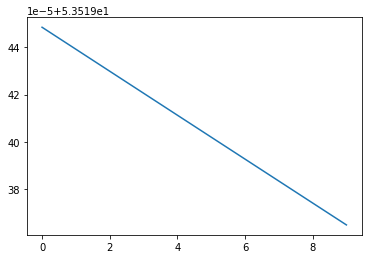

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(AI.squareErrorMatrix[9990:])
plt.show()

##Play Pong with Two AI


> Need Video Device (works with Jupyter Notebook and pip install pygame)






In [11]:
#%run "pongDNN.ipynb"
!pip install pygame;

# 
import pygame, sys
from pygame.locals import *

from IPython.core.debugger import set_trace

# Number of frames per second
# Change this value to speed up or slow down your game
FPS = 2000000000

#Global Variables to be used through our program

WINDOWWIDTH = 400
WINDOWHEIGHT = 300
LINETHICKNESS = 10
PADDLESIZE = 50
PADDLEOFFSET = 20
#14590

# Set up the colours
BLACK     = (0,255,255)
WHITE     = (0,0,255)

#Draws the arena the game will be played in. 
def drawArena():
    DISPLAYSURF.fill((0,255,0))
    #Draw outline of arena
    pygame.draw.rect(DISPLAYSURF, WHITE, ((0,0),(WINDOWWIDTH,WINDOWHEIGHT)), LINETHICKNESS*2)
    #Draw centre line
    pygame.draw.line(DISPLAYSURF, WHITE, (int(WINDOWWIDTH/2),0),(int(WINDOWWIDTH/2),WINDOWHEIGHT), int(LINETHICKNESS/4))


#Draws the paddle
def drawPaddle(paddle):
    #Stops paddle moving too low
    if paddle.bottom > WINDOWHEIGHT - LINETHICKNESS:
        paddle.bottom = WINDOWHEIGHT - LINETHICKNESS
    #Stops paddle moving too high
    elif paddle.top < LINETHICKNESS:
        paddle.top = LINETHICKNESS
    #Draws paddle
    pygame.draw.rect(DISPLAYSURF, WHITE, paddle)


#draws the ball
def drawBall(ball):
    pygame.draw.rect(DISPLAYSURF, WHITE, ball)

#moves the ball returns new position
def moveBall(ball, ballDirX, ballDirY):
    ball.x += ballDirX 
    ball.y += ballDirY
    return ball

#Checks for a collision with a wall, and 'bounces' ball off it.
#Returns new direction
def checkEdgeCollision(ball, ballDirX, ballDirY):
    if ball.top == (LINETHICKNESS) or ball.bottom == (WINDOWHEIGHT - LINETHICKNESS):
        ballDirY = ballDirY * -1
    if ball.left == (LINETHICKNESS) or ball.right == (WINDOWWIDTH - LINETHICKNESS):
        ballDirX = ballDirX * -1
    return ballDirX, ballDirY

#Checks is the ball has hit a paddle, and 'bounces' ball off it.     
def checkHitBall(ball, paddle1, paddle2, ballDirX):
    if ballDirX == -1 and paddle1.right == ball.left and paddle1.top-20 < ball.top and paddle1.bottom+20 > ball.bottom:
        return -1
    elif ballDirX == 1 and ball.right-paddle2.left > 0 and ball.right-paddle2.left < LINETHICKNESS/2 and \
                    paddle2.top-20 < ball.top and paddle2.bottom+20 > ball.bottom:
        return -1
    else: return 1

#Checks to see if a point has been scored returns new score
def checkPointScored(paddle1, paddle2, ball, ascore, pscore, reset, ballDirX):
    #reset points if right wall is hit
    global FPS
    if ball.right == WINDOWWIDTH - LINETHICKNESS: 
        ascore = 14590
        pscore = 14590
        FPS = 200
        reset = True
        return ascore, pscore, reset
    #1 point for hitting the ball
    elif ballDirX == 1 and ball.right-paddle2.left > 0 and ball.right-paddle2.left < LINETHICKNESS/2 and \
                    paddle2.top-20 < ball.top and paddle2.bottom+20 > ball.bottom:
        pscore += 1
        #PADDLESIZE -= 0.25
        FPS += 5
        return ascore, pscore, reset
    elif ballDirX == -1 and paddle1.right == ball.left and paddle1.top-20 < ball.top and paddle1.bottom+20 > ball.bottom:
        ascore += 1
        #PADDLESIZE -= 0.25
        FPS += 5
        return ascore, pscore, reset
    #5 points for beating the other paddle
    elif ball.left == LINETHICKNESS:
        ascore = 0
        pscore = 0
        reset = True
        return ascore, pscore, reset
    #if no points scored, return score unchanged
    else: return ascore, pscore, reset

# TODO 2 - part B - Record training data
import csv
def recordData(ball, ballDirX, ballDirY, paddle1, change):    
    fileName = "pongdata" + str('.csv')
    with open(fileName, mode='a') as pongData_file:
        pongData_writer = csv.writer(pongData_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        #pongData_writer.writerow([ball.x, ball.y, ballDirX, ballDirY, paddle1.y, change])   
        pongData_writer.writerow([ball.y, ballDirX, paddle1.y, change])   
    
# Conventional computer player 
def conventionalPlayer(ball, ballDirX, paddle2):
    paddle2yInc = 0

    # TODO 1
    # write code to make the computer play the paddle
    #print(ball.y,paddle1.y)
    
    paddle2yInc = ball.y - paddle2.y
    
    paddle2.y += paddle2yInc 
    return paddle2.y
    
# Smart computer player 
def smartPlayer(ball, ballDirX, ballDirY, paddle1):
    paddle1yInc = 0

    # TODO 1
    # write code to make the computer play the paddle
    #print(ball.y,paddle1.y)
    #paddle1yInc = ball.y - paddle1.y
    
    if ballDirX == -1:
        delta = ball.left - paddle1.right
        newY = ballDirY*delta + ball.y
        if newY > 0  and newY < 300:
            paddle1.y = newY - 25
    recordData(ball, ballDirX, ballDirY, paddle1)
    return paddle1
    
# Chaotic good computer player 
def legalPlayer(ball, ballDirX, ballDirY, paddle1):
    paddle1yInc = 0
    change = 0
    cfactor=0.5
    # TODO 1
    # write code to make the computer play the paddle
    #print(ball.y,paddle1.y)
    #paddle1yInc = ball.y - paddle1.y
    
    if ballDirX == -1 and ball.x < WINDOWWIDTH/2:
        delta = ball.left - paddle1.right
        newPos = ballDirY*delta + ball.y - 25
        if newPos <= 0:
            newPos = 0
        elif newPos >= WINDOWHEIGHT:
            newPos = WINDOWHEIGHT
        try:
            change = (abs(paddle1.y-newPos)/(paddle1.y-newPos))
            cfactor = (change + 1) / 2
            paddle1.y -= change
            recordData(ball, ballDirX, ballDirY, paddle1, cfactor)
        except:
            None
    return paddle1
    
# Training data generator for the DNN 
def trainingDataGeneratorForAI(ball, ballDirX, paddle1):
    paddle1yInc = 0

    # TODO 2 - part A - write the logic for your training program 
    # Leverage conventionalPlayer code OR leverage your own manual play   
    # Call recordData(???, ???, ???, ...) to record the training data in a csv file
    
    paddle1 = conventionalPlayer(ball, ballDirX, paddle1)
    recordData(ball, ballDirX, None, paddle1)
    #paddle1.y += paddle1yInc      
    return paddle1

# pong playing DNN
def neuralNetworkAI(ball, ballDirX, ballDirY, paddle1):   
    paddle1yInc = 0

    # TODO 3 - Hook up your trained neural network to play the game
    paddle1.y -= (2 * round(np.asscalar(AI.predictLabels(np.array([ball.y, ballDirX, paddle1.y]))))) - 1
    #print(AI.predictLabels(np.array([ball.y, ballDirX, paddle1.y])))
    #paddle1.y += paddle1yInc
    return paddle1

def player1(ball, ballDirX, ballDirY, paddle1, dy):
    paddle1.y += dy
    return paddle1

#Displays the current score on the screen
def displayScore(score):
    resultSurf = BASICFONT.render('Player Score = %s' %(score), True, WHITE)
    resultRect = resultSurf.get_rect()
    resultRect.topleft = (WINDOWWIDTH - 185, 25)
    DISPLAYSURF.blit(resultSurf, resultRect)
    
def displayScore2(score):
    resultSurf = BASICFONT.render('AI Score = %s' %(score), True, WHITE)
    resultRect = resultSurf.get_rect()
    resultRect.topleft = (WINDOWWIDTH- 370, 25)
    DISPLAYSURF.blit(resultSurf, resultRect)
    
#Main function
def main():
    pygame.init()
    global DISPLAYSURF
    ##Font information
    global BASICFONT, BASICFONTSIZE
    BASICFONTSIZE = 20
    BASICFONT = pygame.font.Font('freesansbold.ttf', BASICFONTSIZE)

    FPSCLOCK = pygame.time.Clock()
    DISPLAYSURF = pygame.display.set_mode((WINDOWWIDTH,WINDOWHEIGHT)) 
    pygame.display.set_caption('Pong')

    #Initiate variable and set starting positions
    #any future changes made within rectangles
    ballX = WINDOWWIDTH/2 - LINETHICKNESS/2
    ballY = WINDOWHEIGHT/2 - LINETHICKNESS/2
    playerOnePosition = (WINDOWHEIGHT - PADDLESIZE) /2
    playerTwoPosition = (WINDOWHEIGHT - PADDLESIZE) /2
    ascore = 14590
    pscore = 14590
    dy=0
    
    reset = False

    #Keeps track of ball direction
    ballDirX = -1 ## -1 = left 1 = right
    ballDirY = 1 ## -1 = up 1 = down
    lastDir = 1
    #ballspeed = 1

    #Creates Rectangles for ball and paddles.
    paddle1 = pygame.Rect(PADDLEOFFSET,playerOnePosition, LINETHICKNESS,PADDLESIZE)
    paddle2 = pygame.Rect(WINDOWWIDTH - PADDLEOFFSET - LINETHICKNESS, playerTwoPosition, LINETHICKNESS,PADDLESIZE)
    ball = pygame.Rect(ballX, ballY, LINETHICKNESS, LINETHICKNESS)

    #Draws the starting position of the Arena
    drawArena()
    drawPaddle(paddle1)
    drawPaddle(paddle2)
    drawBall(ball)

    pygame.mouse.set_visible(0) # make cursor invisible

    while True: #main game loop
        for event in pygame.event.get():
            if event.type == QUIT:
                pygame.quit()
                sys.exit()
            # mouse movement commands
            #elif event.type == MOUSEMOTION:
            #    mousex, mousey = event.pos
            #    paddle2.y = mousey

        pressed = pygame.key.get_pressed()
        if pressed[pygame.K_UP]:
            dy = -1
        elif pressed[pygame.K_DOWN]:
            dy = 1
        else:
            dy=0
        if reset == True:
            reset = False
            ball.x = WINDOWWIDTH/2
            ball.y = WINDOWHEIGHT/2
            ballDirX = -1 ## -1 = left 1 = right
            ballDirY = -1 * lastDir
            lastDir = -1 * lastDir
            
            
        
        
        ball = moveBall(ball, ballDirX, ballDirY)
        ballDirX, ballDirY = checkEdgeCollision(ball, ballDirX, ballDirY)
        ascore, pscore, reset = checkPointScored(paddle1, paddle2, ball, ascore, pscore, reset, ballDirX)
        ballDirX = ballDirX * checkHitBall(ball, paddle1, paddle2, ballDirX)
        
        #paddle2.y = conventionalPlayer(ball, ballDirX, paddle2)
        
        #paddle1 = smartPlayer(ball, ballDirX, ballDirY, paddle1)
        #paddle1 = legalPlayer(ball, ballDirX, ballDirY, paddle1)
        #paddle1 = trainingDataGeneratorForAI (ball, ballDirX, paddle1)
        paddle1 = neuralNetworkAI (ball, ballDirX, ballDirY, paddle1)
        paddle2 = neuralNetworkAI (ball, ballDirX, ballDirY, paddle2)
        #paddle2 = player1 (ball, ballDirX, ballDirY, paddle2, dy)
        
        drawArena()
        drawPaddle(paddle1)
        drawPaddle(paddle2)
        drawBall(ball)
        
        displayScore2(ascore)
        displayScore(pscore)

        pygame.display.update()
        FPSCLOCK.tick(FPS)
        
    pygame.display.quit()

if __name__=='__main__':
    main()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 64.8 MB/s 
pygame 2.1.2 (SDL 2.0.16, Python 3.7.15)
Hello from the pygame community. https://www.pygame.org/contribute.html


error: ignored